In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf
from pandas_datareader import data as web
from datetime import datetime

In [2]:
assets=['RELIANCE.NS','TCS.NS','HDFCBANK.NS','INFY.NS','HINDUNILVR.NS','ITC.NS','ICICIBANK.NS','AXISBANK.NS','SBIN.NS','LT.NS']

In [3]:
weights=np.array([0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25])

In [4]:
stockSD= '2015-01-01'

In [5]:
today=datetime.today().strftime('%Y-%m-%d')
today

'2023-07-03'

In [6]:
df=pd.DataFrame()

In [7]:
for stock in assets:
    data = yf.download(stock, start=stockSD, end=today)
    df[stock] = data['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
df

,RELIANCE.NS,TCS.NS,HDFCBANK.NS,INFY.NS,HINDUNILVR.NS,ITC.NS,ICICIBANK.NS,AXISBANK.NS,SBIN.NS,LT.NS
Date,,,,,,,,,,
2015-01-01,417.988892,1067.908447,446.356476,392.729584,657.677063,191.179535,297.247772,488.252899,290.288177,872.795044
2015-01-02,416.882568,1082.130005,452.568573,400.447357,655.509277,191.778381,305.685120,499.171997,291.443787,891.203918
2015-01-05,412.316223,1065.685059,448.747589,397.006195,659.281250,192.533401,306.317902,502.326416,289.132538,903.602356
2015-01-06,393.603485,1026.397095,441.761871,388.711700,671.768066,187.586655,293.324432,484.370575,277.252930,873.462830
2015-01-07,402.171326,1014.273010,443.051208,390.571411,695.354004,184.097870,285.393311,483.982361,277.484039,871.372314
...,...,...,...,...,...,...,...,...,...,...
2023-06-21,2564.300049,3258.199951,1635.599976,1299.349976,2676.600098,447.049988,924.700012,966.000000,566.349976,2394.449951
2023-06-22,2535.500000,3238.500000,1643.599976,1281.550049,2654.350098,447.649994,925.750000,966.599976,562.950012,2416.250000
2023-06-23,2514.750000,3216.350098,1643.500000,1265.000000,2641.600098,444.750000,923.500000,958.400024,554.599976,2389.550049


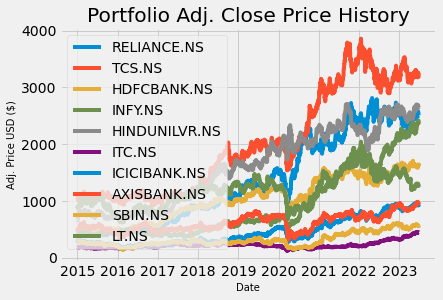

In [10]:
title = 'Portfolio Adj. Close Price History'
my_stocks = df

for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)

plt.title(title)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Adj. Price USD ($)',fontsize=10)
plt.legend(my_stocks.columns.values,loc='upper left')
plt.show()

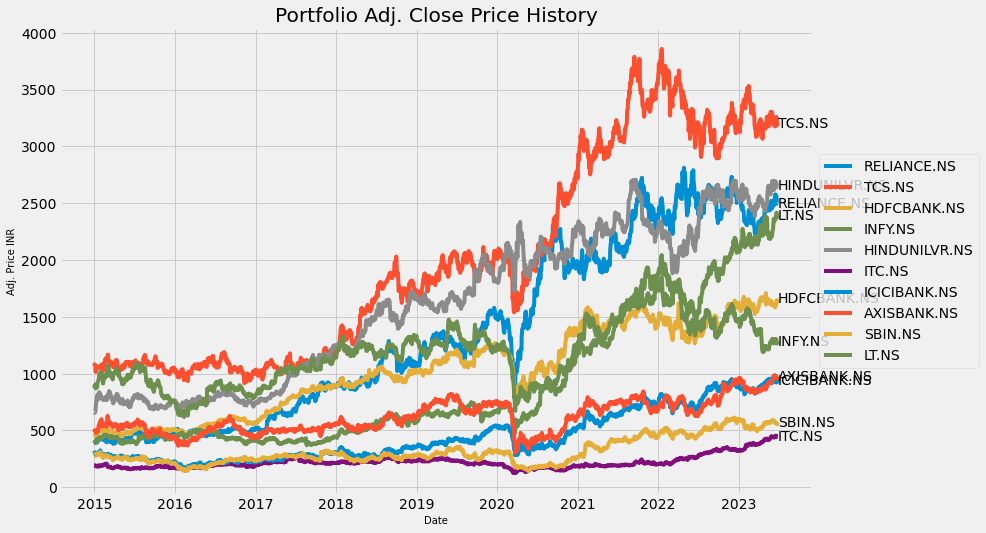

In [11]:
title = 'Portfolio Adj. Close Price History'
my_stocks = df

fig, ax = plt.subplots(figsize=(12, 8))

for c in my_stocks.columns.values:
  ax.plot(my_stocks[c], label=c)

ax.set_title(title)
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Adj. Price INR', fontsize=10)

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the stock names on the right side
for c in my_stocks.columns.values:
    ax.text(my_stocks.index[-1], my_stocks[c][-1], c, va='center')

plt.show()

In [12]:
returns = df.pct_change()
returns

,RELIANCE.NS,TCS.NS,HDFCBANK.NS,INFY.NS,HINDUNILVR.NS,ITC.NS,ICICIBANK.NS,AXISBANK.NS,SBIN.NS,LT.NS
Date,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.002647,0.013317,0.013917,0.019652,-0.003296,0.003132,0.028385,0.022364,0.003981,0.021092
2015-01-05,-0.010954,-0.015197,-0.008443,-0.008593,0.005754,0.003937,0.002070,0.006319,-0.007930,0.013912
2015-01-06,-0.045384,-0.036866,-0.015567,-0.020893,0.018940,-0.025693,-0.042418,-0.035745,-0.041087,-0.033355
2015-01-07,0.021768,-0.011812,0.002919,0.004784,0.035110,-0.018598,-0.027039,-0.000801,0.000834,-0.002393
...,...,...,...,...,...,...,...,...,...,...
2023-06-21,0.002816,0.009449,0.017481,-0.003107,0.000187,-0.012808,-0.000918,-0.009078,-0.001851,0.005227
2023-06-22,-0.011231,-0.006046,0.004891,-0.013699,-0.008313,0.001342,0.001135,0.000621,-0.006003,0.009104
2023-06-23,-0.008184,-0.006840,-0.000061,-0.012914,-0.004803,-0.006478,-0.002430,-0.008483,-0.014833,-0.011050


In [13]:
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

,RELIANCE.NS,TCS.NS,HDFCBANK.NS,INFY.NS,HINDUNILVR.NS,ITC.NS,ICICIBANK.NS,AXISBANK.NS,SBIN.NS,LT.NS
RELIANCE.NS,0.083141,0.018896,0.026612,0.020220,0.018322,0.018280,0.035297,0.036243,0.035332,0.027821
TCS.NS,0.018896,0.057747,0.014585,0.036282,0.013637,0.011609,0.016853,0.017594,0.015243,0.015835
HDFCBANK.NS,0.026612,0.014585,0.053374,0.017834,0.015098,0.017871,0.040225,0.039041,0.034889,0.030945
INFY.NS,0.020220,0.036282,0.017834,0.073079,0.014489,0.011574,0.021927,0.022326,0.019474,0.019716
HINDUNILVR.NS,0.018322,0.013637,0.015098,0.014489,0.053921,0.014223,0.018681,0.020978,0.016579,0.017149
ITC.NS,0.018280,0.011609,0.017871,0.011574,0.014223,0.068430,0.025557,0.024186,0.030043,0.022768
ICICIBANK.NS,0.035297,0.016853,0.040225,0.021927,0.018681,0.025557,0.110697,0.078656,0.078929,0.047534
AXISBANK.NS,0.036243,0.017594,0.039041,0.022326,0.020978,0.024186,0.078656,0.124348,0.070016,0.048596
SBIN.NS,0.035332,0.015243,0.034889,0.019474,0.016579,0.030043,0.078929,0.070016,0.122825,0.048630
LT.NS,0.027821,0.015835,0.030945,0.019716,0.017149,0.022768,0.047534,0.048596,0.048630,0.074505


In [14]:
port_variance = np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.207203882262469

In [15]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.4551965314701651

In [16]:
portfolio_simple_annual_return = np.sum(returns.mean()*weights)*252
portfolio_simple_annual_return

0.4373989439320487

In [17]:
percent_var = str(round(port_variance,2)*100)+'%'
percent_vola = str(round(port_volatility,2)*100)+'%'
percent_ret = str(round(portfolio_simple_annual_return,2)*100)+'%'

print('Expected annual return: '+percent_ret)
print('Annual volatility/ risk: '+percent_vola)
print('Annual variance: '+percent_var)

Expected annual return: 44.0%
Annual volatility/ risk: 46.0%
Annual variance: 21.0%


In [18]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [19]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3]+w[4] == 1)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights() 
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('RELIANCE.NS', 0.29425), ('TCS.NS', 0.08652), ('HDFCBANK.NS', 0.227), ('INFY.NS', 0.07623), ('HINDUNILVR.NS', 0.31599), ('ITC.NS', 0.09142), ('ICICIBANK.NS', 0.14502), ('AXISBANK.NS', -0.16993), ('SBIN.NS', -0.13772), ('LT.NS', 0.07121)])
Expected annual return: 20.5%
Annual volatility: 17.7%
Sharpe Ratio: 1.05


(0.20510332917088966, 0.177026938236377, 1.0456223838867313)

In [20]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights,latest_prices,total_portfolio_value = 100000)

allocation,leftover = da.lp_portfolio()
print('Discrete allocation: ',allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'RELIANCE.NS': 9, 'TCS.NS': 2, 'HDFCBANK.NS': 10, 'INFY.NS': 5, 'HINDUNILVR.NS': 9, 'ITC.NS': 16, 'ICICIBANK.NS': 12, 'LT.NS': 2, 'AXISBANK.NS': -17, 'SBIN.NS': -24}
Funds remaining: $1795.80


C:\Users\Shazeb\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
C:\Users\Shazeb\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


C:\Users\Shazeb\AppData\Local\Temp\ipykernel_16256\302482468.py:32: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe Ratio')


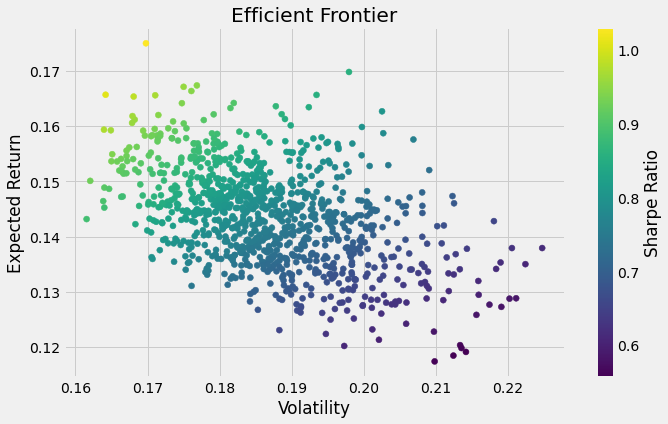

In [21]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Generate random portfolios
n_portfolios = 1000
port_returns = []
port_volatility = []
port_weights = []

for _ in range(n_portfolios):
    # Randomly generate weights
    weights = np.random.random(len(df.columns))
    weights /= np.sum(weights)
    
    # Calculate portfolio expected return and volatility
    returns = np.dot(weights, mu)
    volatility = np.sqrt(np.dot(weights.T, np.dot(S, weights)))
    
    # Append results to lists
    port_returns.append(returns)
    port_volatility.append(volatility)
    port_weights.append(weights)

# Convert lists to arrays
port_returns = np.array(port_returns)
port_volatility = np.array(port_volatility)
port_weights = np.array(port_weights)

# Plot efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(port_volatility, port_returns, c=port_returns / port_volatility, marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.show()